In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.optimizers import Adam

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


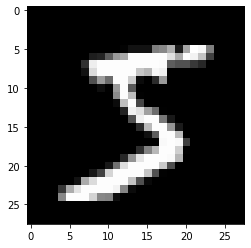

In [5]:
plt.imshow(x_train[0], cmap='gray')

In [6]:
y_train[0]

5

In [7]:
x_train = np.expand_dims(x_train, axis= 3)
x_test = np.expand_dims(x_test, axis= 3)

In [8]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
x_train, x_test = x_train/255, x_test/255

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import MaxPooling2D, Conv2D

def my_convnet_1():
  model = Sequential()
  model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D((2,2)))

  model.add(Conv2D(16, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2,2)))

  model.add(Flatten())
  model.add(Dense(100, activation='relu'))

  model.add(Dropout(0.5))

  model.add(Dense(10, activation='softmax'))

  # model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  model.compile(optimizer= "adam", loss='categorical_crossentropy', metrics=["accuracy"])

  return model


In [13]:
model = my_convnet_1()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 100)               4

In [15]:
history = model.fit(x_train, y_train, epochs=8, validation_split=0.2, batch_size=256, verbose=1, shuffle=True)

Epoch 1/8
188/188 [==============================] - 8s 23ms/step - loss: 0.6214 - accuracy: 0.8041 - val_loss: 0.1256 - val_accuracy: 0.9626
Epoch 2/8
188/188 [==============================] - 4s 19ms/step - loss: 0.1797 - accuracy: 0.9465 - val_loss: 0.0902 - val_accuracy: 0.9739
Epoch 3/8
188/188 [==============================] - 4s 20ms/step - loss: 0.1338 - accuracy: 0.9612 - val_loss: 0.0679 - val_accuracy: 0.9796
Epoch 4/8
188/188 [==============================] - 2s 13ms/step - loss: 0.1098 - accuracy: 0.9685 - val_loss: 0.0609 - val_accuracy: 0.9807
Epoch 5/8
188/188 [==============================] - 2s 12ms/step - loss: 0.0941 - accuracy: 0.9719 - val_loss: 0.0549 - val_accuracy: 0.9835
Epoch 6/8
188/188 [==============================] - 2s 12ms/step - loss: 0.0839 - accuracy: 0.9749 - val_loss: 0.0501 - val_accuracy: 0.9847
Epoch 7/8
188/188 [==============================] - 2s 12ms/step - loss: 0.0756 - accuracy: 0.9773 - val_loss: 0.0478 - val_accuracy: 0.9857
Epoch 

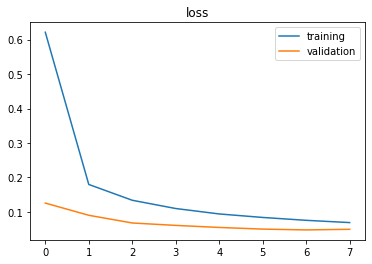

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['training', 'validation'])
plt.show()

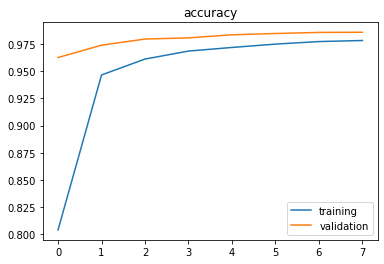

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['training', 'validation'])
plt.show()

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)

In [19]:
print('error', score[0])
print('acuracy', score[1])

error 0.0389961376786232
acuracy 0.9883999824523926


In [20]:
model.save('CNN_model.h5')

In [22]:
from google.colab import files

files.download('CNN_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>